In [2]:
!pip install konlpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 460kB 36.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
DATA_IN_PATH = '/content/drive/MyDrive/2021-1/AI데이터활용교재개발/자연어처리(텐서플로,머신러닝)/code/data/chatbot/'
data = pd.read_csv(DATA_IN_PATH + 'ChatbotData.csv', encoding='utf-8')
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


전체 문장에 대한 분석
- 문자 단위의 길이 분석(음절)
- 단어 단위의 길이 분석(어절)
- 형태소 단위의 길이 분석

In [7]:
sentences = list(data['Q'] + list(data['A']))

In [8]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences] # 문장 길이를 담은 벡터
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences] # 음절 기반 길이를 담은 벡터

okt = Okt()# 형태소 분석기 로드

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences] # 형태소 분석
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]# 형태소 기반 문장 길이를 담은 벡터

Text(0, 0.5, 'Number of Sentences')

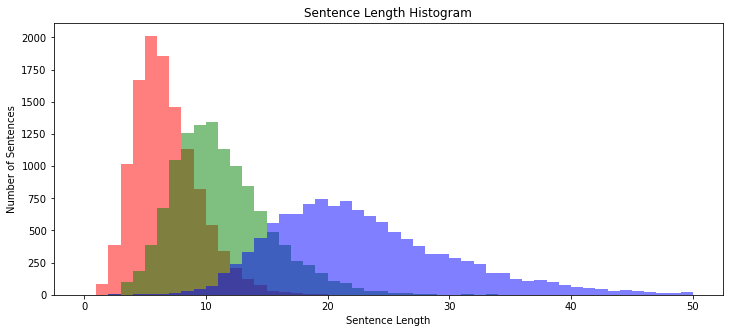

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

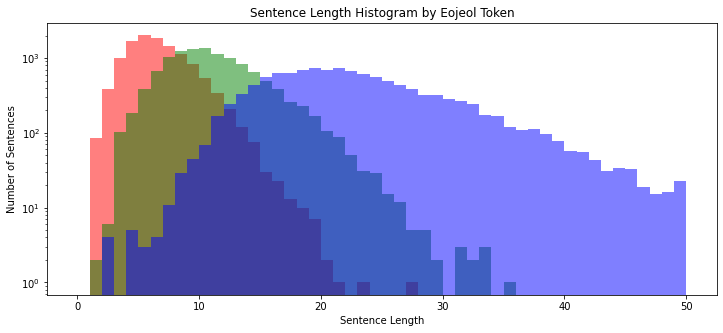

In [10]:
# 로그를 씌운 버젼
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')